
#1. Prequisite
Perform the following steps before trying the exercises:

* a) Import pandas as "pd" and load the lab1 dataset into "df".
* b) Print dataset information to refresh your memory.
* c) Run preprocess_data function on the dataframe to perform preprocessing steps discussed last week.
* d) Split your data into training and test with 70:30 distribution, stratified, random state 0.




### a) Import pandas as "pd" and load the lab1 dataset into "df".

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### b) Print dataset information to refresh your memory.

In [ ]:
df = pd.read_csv("lab1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


In [ ]:
pd.Series.describe(df.DemAge)
pd.Series.unique(df.DemAge)
pd.Series.value_counts(df.DemAge)
pd.Series.value_counts(df.DemAge, bins=10)

(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64

### c) Run preprocess_data function on the dataframe to perform preprocessing steps discussed last week.

In [ ]:
df.groupby('TargetB')['DemAge'].mean()

#Raw count of genders of lapsing and non-lapsing donors
df.groupby('TargetB')['DemGender'].value_counts()

#Normalised count (percentage) of genders of lapsing and non-lapsing donors
df.groupby('TargetB')['DemGender'].value_counts(normalize=True)

TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64

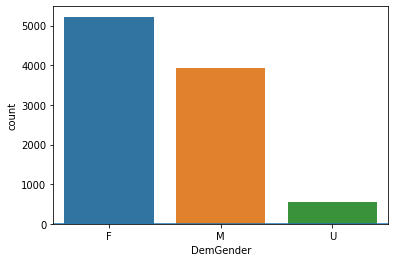

In [ ]:
# 'DemAge' has missing values so use dropna
sns.distplot(df['DemAge'].dropna())
sns.countplot(data=df, x='DemGender')

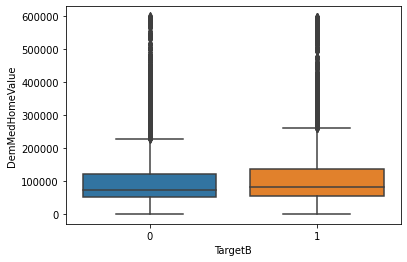

In [ ]:
sns.boxplot(x="TargetB", y="DemMedHomeValue", data=df)

In [ ]:
# change DemCluster from int to str
df['DemCluster'] = df['DemCluster'].astype(str)

df.DemHomeOwner.describe()

# change DemHomeOwner from Object to Binary
dem_home_owner = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner)

df.DemMedIncome.value_counts(bins=10)

(40000.2, 60000.3]      3490
(-200.002, 20000.1]     2367
(20000.1, 40000.2]      1701
(60000.3, 80000.4]      1471
(80000.4, 100000.5]      420
(100000.5, 120000.6]     149
(120000.6, 140000.7]      52
(140000.7, 160000.8]      20
(160000.8, 180000.9]      14
(180000.9, 200001.0]       2
Name: DemMedIncome, dtype: int64

In [ ]:
negative_val = df['DemMedIncome'] < 0
df.loc[negative_val, 'DemMedIncome'] = np.nan

In [ ]:
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

In [ ]:
df.drop(['ID', 'TargetD'], axis=1, inplace=True)

col_StatusCat96NK = LabelEncoder()
col_DemGender = LabelEncoder()
df["StatusCat96NK"] = col_StatusCat96NK.fit_transform(df["StatusCat96NK"])
df["DemGender"] = col_StatusCat96NK.fit_transform(df["DemGender"])

### d) Split your data into training and test with 70:30 distribution, stratified, random state 0.

In [ ]:
# target/input split
y = df['TargetB']
X = df.drop(['TargetB'], axis=1)

X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=0 )

#2. Standardisation and Logistic Regression


Perform following operations and answer the following questions:


* a) What is the difference between logistic regression and linear regression?  
* b) Describe how logistic regression perform its prediction. 
* c) Write code to perform standardisation on your training and test dataset. 
* d) What does standardisation do to your data? How does it benefit your regression model? 
* e) Write code to fit a logistic regression model to your training data. 
How does it perform on the training and test data? 
Do you see any indication of overfitting?  
* f) Write code to find the most important features in your mode

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### a) What is the difference between logistic regression and linear regression?


Structure-wise, linear and logistic regression is actually quite similar. Both of them build prediction by multiplying features/variables to set of weights. The difference is, logistic regression apply logistic function to transform the continuous output into range of 0.0-1.0 probability of binary class.

### b) Describe how logistic regression perform its prediction?

Build prediction by multiplying features/variables to set of weights. The difference is, logistic regression apply logistic function to transform the continuous output into range of 0.0-1.0 probability of binary class.

### c) Write code to perform standardisation on your training and test dataset

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### d) What does standardisation do to your data? How does it benefit your regression model?

Standardisation is a process of scaling input features so they have mean of 0 and standard deviation of 1. The largest benefit of standardisation for regression models is ensuring gradient descent updates weights on similar speed. In addition, standardised input features allow us to compare their regression weights and figure out the important variables.

In [ ]:
model = LogisticRegression(random_state=0)
# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### e) Write code to fit a logistic regression model to your training data. How does it perform on the training and test data? Do you see any indication of overfitting?

In [ ]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5803834808259587
Test accuracy: 0.5822436338609773
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1453
           1       0.59      0.56      0.57      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



In [ ]:
print(model.coef_)

[[ 0.0709082  -0.01732891  0.1206918  -0.02957645 -0.02490887 -0.02025645
   0.02276615 -0.03972828 -0.20291125  0.24990133 -0.07457829  0.03194738
   0.11463964 -0.03202259  0.09394036 -0.29114048  0.02061711  0.06388804
  -0.02168498  0.02366331  0.0005103   0.0325273   0.12571797  0.00236088
  -0.02800171]]


### f) Write code to find the most important features in your mode

In [ ]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

GiftCnt36 : 0.07090819918356742
GiftCntAll : -0.01732890826315883
GiftCntCard36 : 0.1206918001558552
GiftCntCardAll : -0.029576452160436965
GiftAvgLast : -0.024908869606054276
GiftAvg36 : -0.020256453408949264
GiftAvgAll : 0.022766146323780437
GiftAvgCard36 : -0.03972827597142287
GiftTimeLast : -0.20291124599381682
GiftTimeFirst : 0.24990133098487952
PromCnt12 : -0.07457829401208826
PromCnt36 : 0.03194738400426869
PromCntAll : 0.11463964007261145
PromCntCard12 : -0.032022590535201505
PromCntCard36 : 0.09394036410822468
PromCntCardAll : -0.2911404780986564
StatusCat96NK : 0.02061711213570228
StatusCatStarAll : 0.06388804069234949
DemCluster : -0.021684975796096347
DemAge : 0.0236633113926274


In [ ]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

PromCntCardAll : -0.2911404780986564
GiftTimeFirst : 0.24990133098487952
GiftTimeLast : -0.20291124599381682
DemMedHomeValue : 0.12571796665239546
GiftCntCard36 : 0.1206918001558552
PromCntAll : 0.11463964007261145
PromCntCard36 : 0.09394036410822468
PromCnt12 : -0.07457829401208826
GiftCnt36 : 0.07090819918356742
StatusCatStarAll : 0.06388804069234949
GiftAvgCard36 : -0.03972827597142287
DemHomeOwner : 0.03252730331711998
PromCntCard12 : -0.032022590535201505
PromCnt36 : 0.03194738400426869
GiftCntCardAll : -0.029576452160436965
DemMedIncome : -0.0280017112919319
GiftAvgLast : -0.024908869606054276
DemAge : 0.0236633113926274
GiftAvgAll : 0.022766146323780437
DemCluster : -0.021684975796096347


In [ ]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=0), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5806784660766962
Test accuracy: 0.5815554026152787
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1453
           1       0.59      0.56      0.57      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906

{'C': 10}


#End of Question